In [51]:
#Step (1): Read Data
import pandas as pd #Read data
import numpy as np  #Array

# Read in dataset (encoding = 'Big5'可顯示出繁體中文)
data_train = pd.read_excel("train_processed.xlsx")
data_train.head() # Show data (看看是否讀取成功)

,手機螢幕溫度(平均),手機螢幕溫度(最大),手機背蓋溫度(平均),平均APP運作指標/小時,充電時間指標,手機電池電量,CPU跑分階級,手機外殼/包膜指標,外型平均曲率,上網頻率指標,通話頻率指標,新機/二手/老舊,內容容量比率,CPU效能等級,Underclocking
0,-2.600452,-2.833071,-3.553067,-0.984729,-0.820966,-5.324059,3,-0.741141,3.593824,-1.395510,-1.225014,-0.494159,0.750427,-1.955921,0
1,-2.606880,-2.838397,-3.544191,-0.984776,2.337184,-5.283197,4,-0.603315,4.295257,-1.395792,-1.225314,-0.494159,0.479721,-1.463128,1
2,-2.628558,-2.857238,-3.556987,-0.984526,0.042620,-5.313652,3,-0.286121,3.844972,-1.395733,-1.225263,-0.494159,0.754607,-1.955921,0
3,-2.627114,-2.852910,-3.541104,-0.984609,-0.586660,-5.333278,3,-0.070108,3.763350,-1.395879,-1.225406,-0.494159,0.306494,-1.955921,1
4,-2.618020,-2.845929,-3.547520,-0.984577,-0.669485,-5.323154,3,-0.448527,3.619669,-1.395727,-1.225276,-0.494159,0.237039,-1.955921,0


In [52]:
data_train.describe()

,手機螢幕溫度(平均),手機螢幕溫度(最大),手機背蓋溫度(平均),平均APP運作指標/小時,充電時間指標,手機電池電量,CPU跑分階級,手機外殼/包膜指標,外型平均曲率,上網頻率指標,通話頻率指標,新機/二手/老舊,內容容量比率,CPU效能等級,Underclocking
count,3801.000000,3801.000000,3801.000000,3801.000000,3801.000000,3801.000000,3801.000000,3801.000000,3801.000000,3801.000000,3801.000000,3801.000000,3801.000000,3801.000000,3801.000000
mean,-2.620272,-2.849565,-3.547868,-0.984604,0.024193,-5.305197,3.300447,-0.364524,3.786543,-1.395746,-1.225267,-0.387907,0.004648,-1.807863,0.429098
std,0.014543,0.013843,0.008447,0.000192,1.054608,0.018987,0.673344,0.614209,0.457693,0.000110,0.000113,0.201416,0.953273,0.331819,0.495012
min,-2.651326,-2.882784,-3.577383,-0.984806,-1.000782,-5.342180,3.000000,-1.076193,-0.072659,-1.395901,-1.225406,-0.494159,-4.469358,-1.955921,0.000000
25%,-2.630685,-2.858999,-3.552881,-0.984732,-0.866802,-5.322004,3.000000,-0.708705,3.525731,-1.395843,-1.225370,-0.494159,-0.321245,-1.955921,0.000000
50%,-2.620425,-2.848114,-3.547182,-0.984670,-0.350019,-5.303272,3.000000,-0.526822,3.751017,-1.395763,-1.225286,-0.494159,0.407399,-1.955921,0.000000
75%,-2.609117,-2.838736,-3.542608,-0.984539,0.691202,-5.289773,3.000000,-0.134930,4.017546,-1.395664,-1.225187,-0.145699,0.682794,-1.955921,1.000000
max,-2.583622,-2.819068,-3.508293,-0.983707,3.402716,-5.271529,6.000000,10.810466,8.133688,-1.395374,-1.224878,1.248144,0.754607,-0.477541,1.000000


In [53]:

# Appendix: Data preprocessing (程式供參考用)
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler, StandardScaler  #建構standardization的物件

name_list_outlier =['手機螢幕溫度(平均)','手機螢幕溫度(最大)', '手機背蓋溫度(平均)','平均APP運作指標/小時', '充電時間指標', '手機電池電量', '上網頻率指標', '通話頻率指標', '內容容量比率']


#離群值處理
def  outlier_del(data_frame,name_list_outlier):
    for i, name in enumerate(name_list_outlier):
        print(name)
        print("Shape Of The Before Ouliers: ", data_frame[name].shape)
    
        # 计算IQR
        Q1 = np.percentile(data_frame[name], 25)
        Q3 = np.percentile(data_frame[name], 75)
        IQR = Q3 - Q1
        n = 10

        # 定义离群值范围
        lower_bound = Q1 - n * IQR
        upper_bound = Q3 + n * IQR

        # 过滤离群值
        filtered_entries = ((data_frame[name] >= lower_bound) & (data_frame[name] <= upper_bound))
        data_frame = data_frame[filtered_entries]
    
        print("Shape Of The After Ouliers: ",data_frame[name].shape)
        print('===================================================================================================================')
    return data_frame

#正規化
def data_normalized(data):
    min_max_scaler = MinMaxScaler()
    data_normalized = min_max_scaler.fit_transform(data)
    return data_normalized

#data_train=outlier_del(data_train,name_list_outlier)
data_train.describe()


,手機螢幕溫度(平均),手機螢幕溫度(最大),手機背蓋溫度(平均),平均APP運作指標/小時,充電時間指標,手機電池電量,CPU跑分階級,手機外殼/包膜指標,外型平均曲率,上網頻率指標,通話頻率指標,新機/二手/老舊,內容容量比率,CPU效能等級,Underclocking
count,3801.000000,3801.000000,3801.000000,3801.000000,3801.000000,3801.000000,3801.000000,3801.000000,3801.000000,3801.000000,3801.000000,3801.000000,3801.000000,3801.000000,3801.000000
mean,-2.620272,-2.849565,-3.547868,-0.984604,0.024193,-5.305197,3.300447,-0.364524,3.786543,-1.395746,-1.225267,-0.387907,0.004648,-1.807863,0.429098
std,0.014543,0.013843,0.008447,0.000192,1.054608,0.018987,0.673344,0.614209,0.457693,0.000110,0.000113,0.201416,0.953273,0.331819,0.495012
min,-2.651326,-2.882784,-3.577383,-0.984806,-1.000782,-5.342180,3.000000,-1.076193,-0.072659,-1.395901,-1.225406,-0.494159,-4.469358,-1.955921,0.000000
25%,-2.630685,-2.858999,-3.552881,-0.984732,-0.866802,-5.322004,3.000000,-0.708705,3.525731,-1.395843,-1.225370,-0.494159,-0.321245,-1.955921,0.000000
50%,-2.620425,-2.848114,-3.547182,-0.984670,-0.350019,-5.303272,3.000000,-0.526822,3.751017,-1.395763,-1.225286,-0.494159,0.407399,-1.955921,0.000000
75%,-2.609117,-2.838736,-3.542608,-0.984539,0.691202,-5.289773,3.000000,-0.134930,4.017546,-1.395664,-1.225187,-0.145699,0.682794,-1.955921,1.000000
max,-2.583622,-2.819068,-3.508293,-0.983707,3.402716,-5.271529,6.000000,10.810466,8.133688,-1.395374,-1.224878,1.248144,0.754607,-0.477541,1.000000


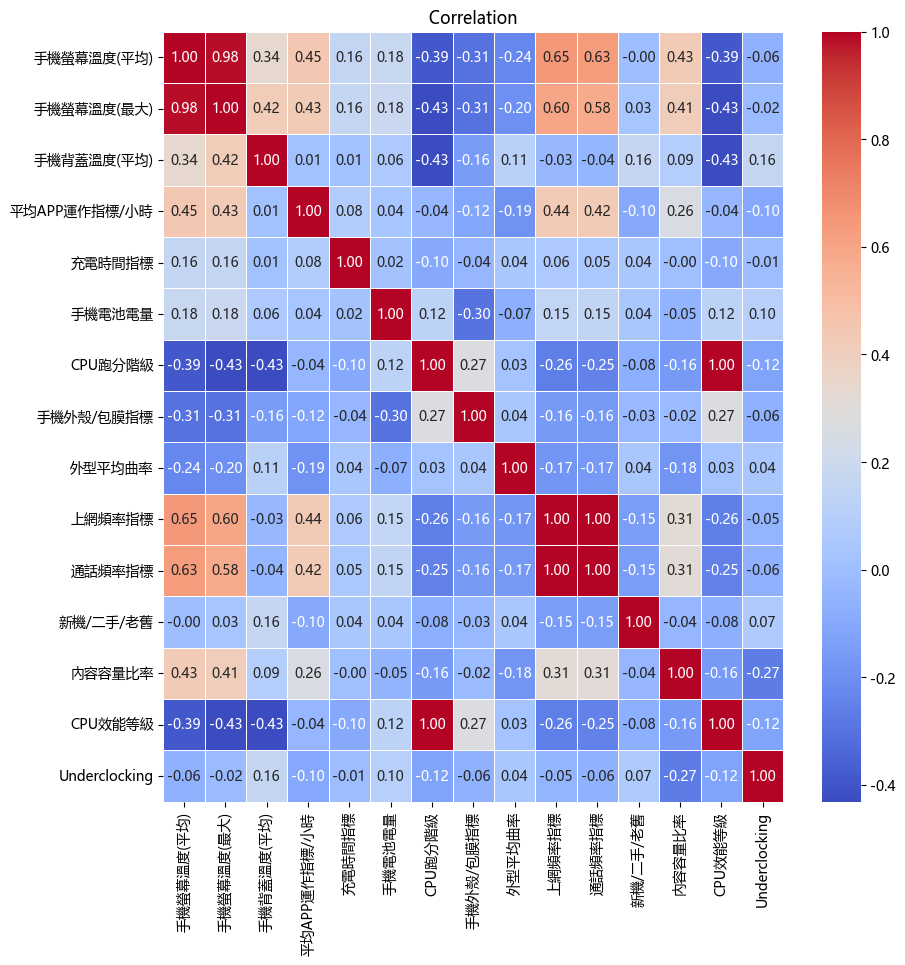

In [54]:
import seaborn as sns
import matplotlib.pyplot as plt

def corr_matrix_graph(data_frame):
    corr_matrix = data_frame.corr()
    plt.figure(figsize=(10, 10))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5,fmt='.2f') #各參數代表的意思請查閱seaborn.heatmap官網的說明
    plt.title(' Correlation ')
    plt.show()
    
corr_matrix_graph(data_train)

In [55]:
#Step (3): 用X儲存features, Y為labels(Underclocking)
y_data = data_train['Underclocking'].to_numpy()
feature_ex =['手機螢幕溫度(平均)', '手機背蓋溫度(平均)', '充電時間指標', '手機電池電量', 'CPU跑分階級', '上網頻率指標', '通話頻率指標', '內容容量比率']	
x_data = data_train[feature_ex].to_numpy()



def data_standardized(data):
    standard_scaler = StandardScaler()
    data_standardized = standard_scaler.fit_transform(data)
    return data_standardized 
x_data=data_normalized(x_data)
x_data=data_standardized(x_data)
print(x_data) 
print(y_data) 

[[ 1.36300652 -0.61562149 -0.80150167 ...  2.1330885   2.23749711
   0.78243834]
 [ 0.92099655  0.43536847  2.19351346 ... -0.41610788 -0.41100958
   0.49842579]
 [-0.56981449 -1.07962976  0.01747584 ...  0.11219075  0.03672694
   0.78682338]
 ...
 [-1.36665061 -0.72751934  0.16482193 ... -1.3547237  -1.2284996
   0.1461305 ]
 [ 0.10900786  0.42781419  0.39875095 ...  0.62857951  0.63988476
  -0.78380936]
 [ 1.30898308  0.16152563 -0.86666265 ...  1.44250353  1.55050655
   0.32371546]]
[0 1 0 ... 0 0 0]


In [56]:

#TomekLinks
from collections import Counter
from imblearn.under_sampling import TomekLinks
print('Original dataset shape %s' % Counter(y_data))
tl = TomekLinks()
x_data, y_data = tl.fit_resample(x_data, y_data)
print('Resampled dataset shape %s' % Counter(y_data))


Original dataset shape Counter({0: 2170, 1: 1631})
Resampled dataset shape Counter({0: 1822, 1: 1631})


In [57]:
#Step (4): 把dataset分成訓練跟驗證
from sklearn.model_selection import train_test_split
#test_size=0.3 為比例-> training:test=7:3
trainX, testX, trainY, testY = train_test_split(x_data, y_data, test_size=0.15, random_state=42)

In [58]:
from xgboost import XGBClassifier
import numpy as np 
# 建立 XGBClassifier 模型
xgboostModel = XGBClassifier(n_estimators=10000, 
                             learning_rate= 0.001,
                             max_depth=5,
                             gamma=5)
# 使用訓練資料訓練模型
xgboostModel.fit(trainX, trainY)
# 使用訓練資料預測分類
predicted = xgboostModel.predict(testX)
print('訓練集: ',xgboostModel.score(trainX,trainY))
print('測試集: ',xgboostModel.score(testX,testY))

訓練集:  0.7533219761499148
測試集:  0.747104247104247


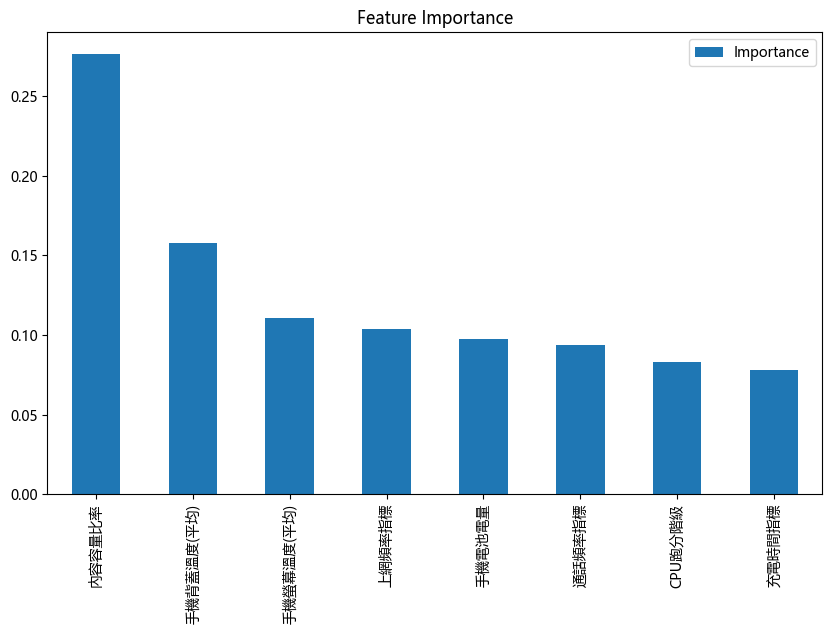

In [59]:
plt.rcParams['font.sans-serif'] = ['Microsoft YaHei']  # 使用微软雅黑
plt.rcParams['axes.unicode_minus'] = False
importances = xgboostModel.feature_importances_
features = feature_ex
importance_df = pd.DataFrame(importances, index=features, columns=['Importance']).sort_values('Importance', ascending=False)
importance_df.plot(kind='bar', figsize=(10, 6))
plt.title('Feature Importance')
plt.show()

In [60]:
'''

def xgboostModel_fun(n=10000, lr=0.01, maxdepth=4, g=10):
    xgboostModel = XGBClassifier(n_estimators=n, 
                                 learning_rate=lr,
                                 max_depth=maxdepth,
                                 gamma=g)
    return xgboostModel

otrn = []
otst = []
change = 10
divisors = np.arange(0, change, 0.1)  # 这样 divisors 就与 otrn 和 otst 长度一致

for g in divisors:
    tree = xgboostModel_fun(g=g) 
    tree.fit(trainX, trainY) 
    otrn.append(1 - tree.score(trainX, trainY)) 
    otst.append(1 - tree.score(testX, testY))

fig, ax = plt.subplots()
fig.set_size_inches((10, 6))
_=ax.plot(divisors, otrn, '--s', label='train', color='k')
_=ax.plot(divisors, otst, '-o', label='test', color='gray')
_=ax.fill_between(divisors, otrn, otst, color='gray', alpha=.3)
_=ax.legend(loc=0)
_=ax.set_xlabel('Gamma value', fontsize=14)  # 更正 x 轴标签
_=ax.set_ylabel('Error', fontsize=14)
_=ax.axis(xmin=0, xmax=change)  # xmax 为 change
fig.tight_layout()
'''

"\n\ndef xgboostModel_fun(n=10000, lr=0.01, maxdepth=4, g=10):\n    xgboostModel = XGBClassifier(n_estimators=n, \n                                 learning_rate=lr,\n                                 max_depth=maxdepth,\n                                 gamma=g)\n    return xgboostModel\n\notrn = []\notst = []\nchange = 10\ndivisors = np.arange(0, change, 0.1)  # 这样 divisors 就与 otrn 和 otst 长度一致\n\nfor g in divisors:\n    tree = xgboostModel_fun(g=g) \n    tree.fit(trainX, trainY) \n    otrn.append(1 - tree.score(trainX, trainY)) \n    otst.append(1 - tree.score(testX, testY))\n\nfig, ax = plt.subplots()\nfig.set_size_inches((10, 6))\n_=ax.plot(divisors, otrn, '--s', label='train', color='k')\n_=ax.plot(divisors, otst, '-o', label='test', color='gray')\n_=ax.fill_between(divisors, otrn, otst, color='gray', alpha=.3)\n_=ax.legend(loc=0)\n_=ax.set_xlabel('Gamma value', fontsize=14)  # 更正 x 轴标签\n_=ax.set_ylabel('Error', fontsize=14)\n_=ax.axis(xmin=0, xmax=change)  # xmax 为 change\nfig.tig

In [61]:

# Read in dataset (encoding = 'Big5'可顯示出繁體中文)
data_test = pd.read_excel("01test.xlsx")
data_test.head() # Show data (看看是否讀取成功)
feature_ex =['手機螢幕溫度(平均)', '手機背蓋溫度(平均)', '充電時間指標', '手機電池電量', 'CPU跑分階級', '上網頻率指標', '通話頻率指標', '內容容量比率']	
test_id=data_test.pop('id')
x_test = data_test[feature_ex].to_numpy()
x_test=data_normalized(x_test)
x_test=data_standardized(x_test)
x_test=data_normalized(x_test)
x_test=data_standardized(x_test)

In [62]:
predicted_ans=xgboostModel.predict(x_test)
my_submission=pd.DataFrame({'id':test_id,'Underclocking':predicted_ans})
my_submission.to_csv('submission_01.csv',index=False)

In [63]:
#Cross-validation
from sklearn.tree import DecisionTreeClassifier  ## decision tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
import xgboost

df =data_train
X = df[['手機螢幕溫度(最大)','手機背蓋溫度(平均)','平均APP運作指標/小時','手機電池電量','內容容量比率']].values
Y = df['Underclocking'].values

In [64]:
params = {}
params['objective'] = 'binary:logistic'
params['eval_metric'] = 'logloss'
params['eta'] = 0.0001
params['max_depth'] = 10
params['learning_rate'] = 0.0001
params['gamma'] = 6

d_train = xgboost.DMatrix(trainX, label=trainY)
d_valid = xgboost.DMatrix(testX, label=testY)

watchlist = [(d_train, 'train'), (d_valid, 'valid')]

bst = xgboost.train(params, d_train, 50000, watchlist, early_stopping_rounds=100, verbose_eval=10)
y_train = bst.predict(xgboost.DMatrix(trainX))
y_pred = bst.predict(xgboost.DMatrix(testX))
print("Accuracy(train): ", str(sum(trainY == (y_train > 0.5))/trainY.shape[0]))
print("Accuracy(test): ", str(sum(testY == (y_pred > 0.5))/testY.shape[0]))

[0]	train-logloss:0.69153	valid-logloss:0.69188
[10]	train-logloss:0.69122	valid-logloss:0.69160
[20]	train-logloss:0.69091	valid-logloss:0.69133
[30]	train-logloss:0.69060	valid-logloss:0.69106
[40]	train-logloss:0.69028	valid-logloss:0.69079
[50]	train-logloss:0.68997	valid-logloss:0.69052
[60]	train-logloss:0.68967	valid-logloss:0.69026
[70]	train-logloss:0.68936	valid-logloss:0.69000
[80]	train-logloss:0.68906	valid-logloss:0.68974
[90]	train-logloss:0.68875	valid-logloss:0.68947


C:\Users\123\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\xgboost\core.py:727: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[100]	train-logloss:0.68845	valid-logloss:0.68921
[110]	train-logloss:0.68815	valid-logloss:0.68896
[120]	train-logloss:0.68784	valid-logloss:0.68870
[130]	train-logloss:0.68754	valid-logloss:0.68844
[140]	train-logloss:0.68724	valid-logloss:0.68818
[150]	train-logloss:0.68694	valid-logloss:0.68792
[160]	train-logloss:0.68664	valid-logloss:0.68767
[170]	train-logloss:0.68634	valid-logloss:0.68741
[180]	train-logloss:0.68604	valid-logloss:0.68715
[190]	train-logloss:0.68574	valid-logloss:0.68690
[200]	train-logloss:0.68545	valid-logloss:0.68664
[210]	train-logloss:0.68515	valid-logloss:0.68639
[220]	train-logloss:0.68485	valid-logloss:0.68614
[230]	train-logloss:0.68456	valid-logloss:0.68588
[240]	train-logloss:0.68426	valid-logloss:0.68563
[250]	train-logloss:0.68397	valid-logloss:0.68538
[260]	train-logloss:0.68368	valid-logloss:0.68513
[270]	train-logloss:0.68338	valid-logloss:0.68487
[280]	train-logloss:0.68309	valid-logloss:0.68462
[290]	train-logloss:0.68280	valid-logloss:0.68437
